# Observation in finite experimental time-window of processes of random onset and duration: Simulation
### by Jongmin Sung and Henrik Flyvbjerg (Last updated on 4/3/2019)

Suppose that we got time trace of signal and we want to measure the mean dwell time (duration of events) to extract the kinetic information. The dynamic signal could be due to protein binding/unbinding or protein conformational changes. At the beginning or end of the time window, we might find incomplete (pre-existing or unfinished) events. If the time window is getting shorter, we have higher chances of finding those incomplete events. <br/>

Considering these circumstances matter when you have a limited ovservation window due to issues such as, <br/>
* if the kinetic rates governing the transition are very slow and you cannot obtain a long trajectory
* time window is limited by technical issues including photo-bleaching, degredation of protein or surface chemistry at room temperature
* you already got large amount data but it is not long enough, and you want to extract information out of it. 

We observe individual binding and unbinding events. <br/>
$\Delta$t = duration of bound state time <br/>
$t_b$ = time at binding occured <br/>
$t_u$ = time at unbinding occured <br/>
$\tau$ = an experimental time-window of fixed duration <br/>

Consequently, we cannot observe $t_b$ and $t_u$ for every bound state we do observe. Thus, every observed bound state belongs to one of four classes: <br/>
I. $t_b$ < 0 < $t_u$ < $\tau$ (Binding occured before we start observing. Unbinding occured before we finish observing) <br/>
II. 0 < $t_b$ < $t_u$ < $\tau$ (Binding occured after we start observing. Unbinding occured before we finish observing) <br/>
III. 0 < $t_b$ < $\tau$ < $t_u$ (Binding occured after we start observing. Unbinding occured after we finish observing) <br/>
IV. $t_b$ < 0 < $\tau$ < $t_u$ (Binding occured before we start observing. Unbinding occured before we finish observing) <br/>

Below, I run a simulation. 

## Import libraries

In [2]:
# Import libraries
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from scipy.stats import geom

sys.path.append("../APC/APC")
import config
from my_funcs import generate_trace, find_dwell

## Below, I simulate traces that have only binary state signal (unbound or bound state). Real experimental data contain noise, and suppose that we processeded the data using a state determining algorithm. 

Text(0.5, 1.0, 'Window size = 100, Mean dwell = 5.00, # traces = 100000')

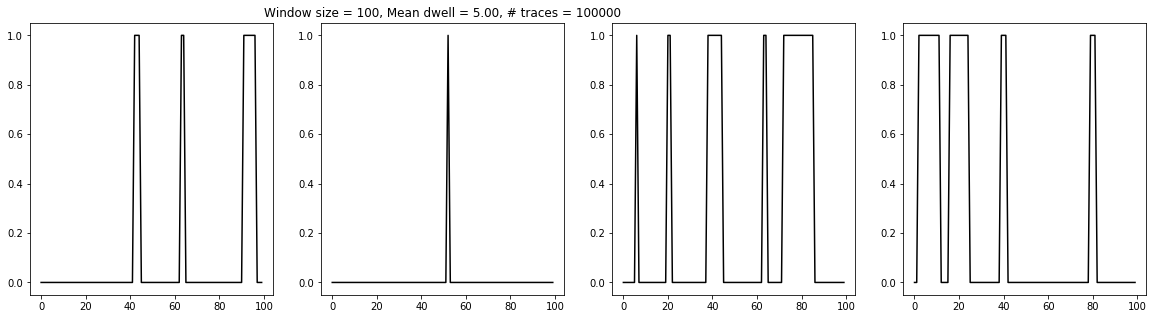

In [3]:
# User parameters
t_b = 5  # Mean bound time in frame (Poisson dwell time)
t_u = 5*t_b # Mean unbound time in frame (Poisson dwell time)

tau = 100 # Size of a window
n_window = 100000 # Number of window
t_total = tau * n_window  # Total lenth of trace

trace_total = generate_trace(t_total, t_b, t_u)
traces = trace_total.reshape((n_window, tau))

# Plot a trace
fig, ((ax0, ax1, ax2, ax3)) = plt.subplots(1,4, figsize=(20, 5))
ax0.plot(traces[0], 'k')
ax1.plot(traces[1], 'k')
ax2.plot(traces[2], 'k')
ax3.plot(traces[3], 'k')
ax1.set_title('Window size = %d, Mean dwell = %.2f, # traces = %d' %(tau, t_b, n_window))

## Dwell time distribution of each class

In [4]:
#I have to figure out the binning issue. Data do not have value at zero which brings the exponential down

# List of dwell times for each class
dwell_class1 = []
dwell_class2 = []
dwell_class3 = []
dwell_class4 = []

for trace in traces:
    t1, t2, t3, t4 = find_dwell(trace)
    dwell_class1.extend(t1)
    dwell_class2.extend(t2)
    dwell_class3.extend(t3)    
    dwell_class4.extend(t4)

dwell_class1 = np.array(dwell_class1)    
dwell_class2 = np.array(dwell_class2) 
dwell_class3 = np.array(dwell_class3) 

# Mean of class 
mean_t1 = np.mean(dwell_class1)-0.5
mean_t2 = np.mean(dwell_class2)-0.5
mean_t3 = np.mean(dwell_class3)-0.5


Text(0.5, 1.0, 'Class 3, t_mean = 5.02 (R), t_true = 5.00 (B)')

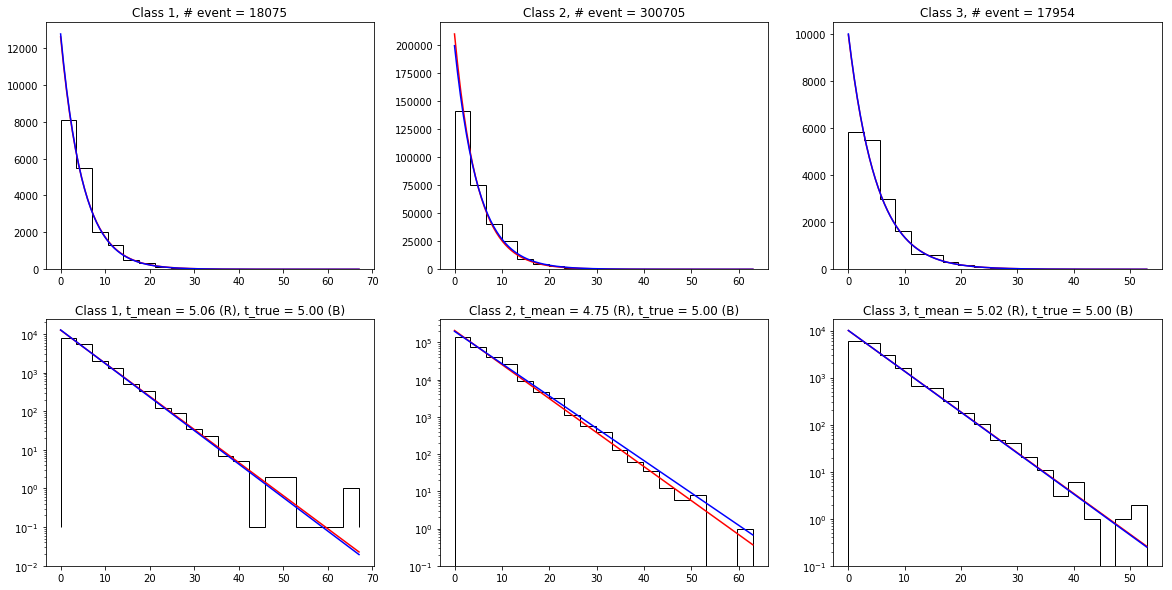

In [5]:
# Histogram    

bins1 = np.linspace(0, max(dwell_class1), 20)
bins2 = np.linspace(0, max(dwell_class2), 20)
bins3 = np.linspace(0, max(dwell_class3), 20)

norm1 = len(dwell_class1)*(bins1[1]-bins1[0])
norm2 = len(dwell_class2)*(bins2[1]-bins2[0])
norm3 = len(dwell_class3)*(bins3[1]-bins3[0])

x1 = np.linspace(0, max(dwell_class1), 200) 
x2 = np.linspace(0, max(dwell_class2), 200) 
x3 = np.linspace(0, max(dwell_class3), 200) 

y1 = np.exp(-x1/mean_t1)/(mean_t1)*norm1
y2 = np.exp(-x2/mean_t2)/(mean_t2)*norm2
y3 = np.exp(-x3/mean_t3)/(mean_t3)*norm3

y1_true = np.exp(-(x1)/t_b)/t_b*norm1
y2_true = np.exp(-(x2)/t_b)/t_b*norm2    
y3_true = np.exp(-(x3)/t_b)/t_b*norm3    
    
# Histogram of each class
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2,3, figsize=(20, 10))
ax0.hist(dwell_class1, bins1, color='k', histtype='step', lw=1)
ax0.plot(x1, y1, 'r')
ax0.plot(x1, y1_true, 'b')
ax0.set_title('Class 1, # event = %d' %(len(dwell_class1)))
ax1.hist(dwell_class2, bins2, color='k', histtype='step', lw=1)
ax1.plot(x2, y2, 'r')
ax1.plot(x2, y2_true, 'b')
ax1.set_title('Class 2, # event = %d' %(len(dwell_class2)))
ax2.hist(dwell_class3, bins3, color='k', histtype='step', lw=1)
ax2.plot(x3, y3, 'r')
ax2.plot(x3, y3_true, 'b')
ax2.set_title('Class 3, # event = %d' %(len(dwell_class3)))

ax3.hist(dwell_class1, bins1, color='k', histtype='step', lw=1, log=True)
ax3.plot(x1, y1, 'r')
ax3.plot(x1, y1_true, 'b')
ax3.set_title('Class 1, t_mean = %.2f (R), t_true = %.2f (B)' %(mean_t1, t_b))
ax4.hist(dwell_class2, bins2, color='k', histtype='step', lw=1, log=True)
ax4.plot(x2, y2, 'r')
ax4.plot(x2, y2_true, 'b')
ax4.set_title('Class 2, t_mean = %.2f (R), t_true = %.2f (B)' %(mean_t2, t_b))
ax5.hist(dwell_class3, bins3, color='k', histtype='step', lw=1, log=True)
ax5.plot(x3, y3, 'r')
ax5.plot(x3, y3_true, 'b')
ax5.set_title('Class 3, t_mean = %.2f (R), t_true = %.2f (B)' %(mean_t3, t_b))


## Estimation of true mean from experimental mean and window size
r = (r * tau - 2 + (r * tau + 2) * exp(-r * tau)) / (r * tau - 1 + exp(-r * tau)) / mean(t)

Text(0.5, 1.0, 'r_correction = 0.20, t_correction = 5.02, t_true = 5.00, t_mean = 4.75')

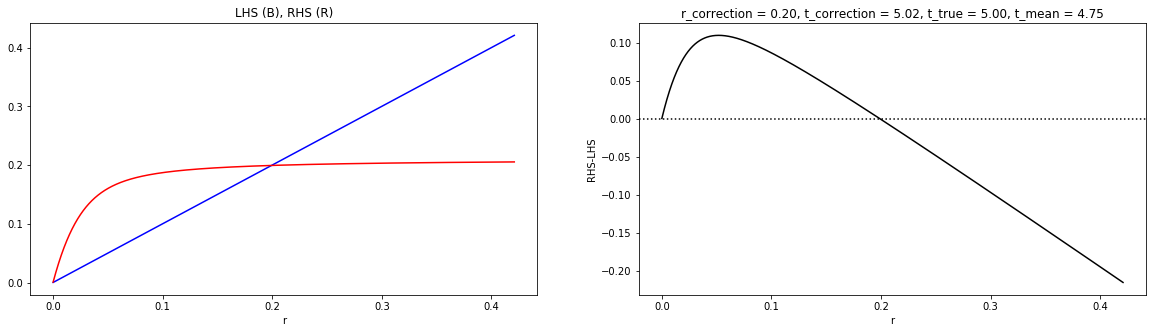

In [6]:
dr = 0.0001
r = np.arange(dr, 2/mean_t2, dr)
LHS = r 
RHS = 1/mean_t2 * (r*tau-2 + (r*tau+2)*np.exp(-r*tau))/(r*tau - 1 + np.exp(-r*tau))
r_correction = r[np.argmin(abs(LHS-RHS))]

    
# Plot a trace
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(20,5))

ax0.plot(r, LHS, 'b')
ax0.plot(r, RHS, 'r')
ax0.set_title('LHS (B), RHS (R)')
ax0.set_xlabel('r')
    
ax1.plot(r, RHS-LHS, 'k')
ax1.axhline(y=0, ls=':', c='k')
ax1.set_xlabel('r')
ax1.set_ylabel('RHS-LHS')
ax1.set_title('r_correction = %.2f, t_correction = %.2f, t_true = %.2f, t_mean = %.2f' %(r_correction, 1/r_correction, t_b, mean_t2))

## Estimation with varying window size

In [7]:
# User parameters
t_b = 10  # Mean bound time in frame (Poisson dwell time)
t_u = 10*t_b # Mean unbound time in frame (Poisson dwell time)

tau_range = np.arange(4*t_b, 40*t_b, 2*t_b) # Size of a window
n_window = 1000 # Number of window
n_dataset = 100

est_mean1 = np.zeros((len(tau_range), n_dataset))
est_mean2 = np.zeros((len(tau_range), n_dataset))
est_mean3 = np.zeros((len(tau_range), n_dataset))
est_corr = np.zeros((len(tau_range), n_dataset))

for i, tau in enumerate(tau_range):
    print(tau)
    t_total = tau * n_window  # Total lenth of trace
    for j in range(n_dataset): 
        trace_total = generate_trace(t_total, t_b, t_u)
        traces = trace_total.reshape((n_window, tau))
        dwell_class1 = []        
        dwell_class2 = []
        dwell_class3 = []        
        for trace in traces:
            t1, t2, t3, t4 = find_dwell(trace)
            dwell_class1.extend(t1)            
            dwell_class2.extend(t2)
            dwell_class3.extend(t3)
            
        # Mean estimation
        est_mean1[i][j] = np.mean(dwell_class1)-0.5        
        est_mean2[i][j] = np.mean(dwell_class2)-0.5
        est_mean3[i][j] = np.mean(dwell_class3)-0.5        

        # Correction estimation
        dr = 0.0001
        r = np.arange(dr, 2/est_mean2[i][j], dr)
        LHS = r 
        RHS = 1/est_mean2[i][j] * (r*tau-2 + (r*tau+2)*np.exp(-r*tau))/(r*tau - 1 + np.exp(-r*tau))
        r_corr = r[np.argmin(abs(LHS-RHS))]        
        est_corr[i][j] = 1/r_corr     
        

40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


Text(0.5, 1.0, '# window = 1000')

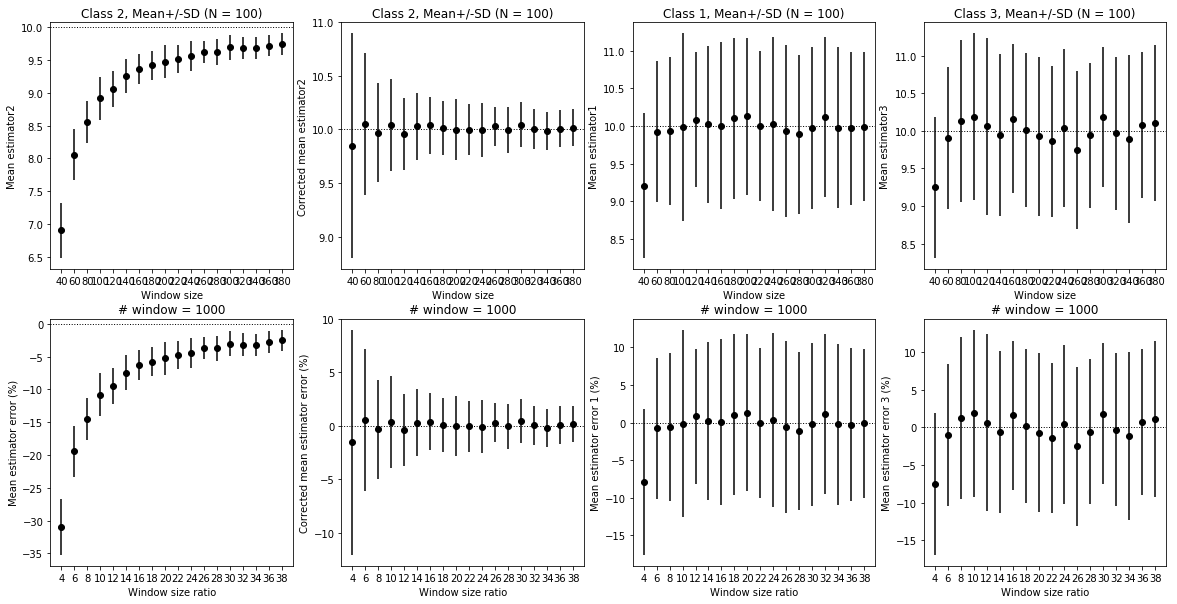

In [8]:
# Plot the result
fig, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(2,4, figsize=(20,10))   

# Class2
ax0.errorbar(tau_range, np.mean(est_mean2, axis=1), yerr = np.std(est_mean2, axis=1), color='k', fmt='o')
ax0.axhline(y=t_b, color='k', linestyle='dotted', lw=1)   
ax0.set_xticks(tau_range)
ax0.set_xlabel('Window size')
ax0.set_ylabel('Mean estimator2')
ax0.set_title('Class 2, Mean+/-SD (N = %d)' %(n_dataset))

# Class2_corrected
ax1.errorbar(tau_range, np.mean(est_corr, axis=1), yerr = np.std(est_corr, axis=1), color='k', fmt='o')
ax1.axhline(y=t_b, color='k', linestyle='dotted', lw=1)   
ax1.set_xticks(tau_range)
ax1.set_xlabel('Window size')
ax1.set_ylabel('Corrected mean estimator2')
ax1.set_title('Class 2, Mean+/-SD (N = %d)' %(n_dataset))   

# Class1
ax2.errorbar(tau_range, np.mean(est_mean1, axis=1), yerr = np.std(est_mean1, axis=1), color='k', fmt='o')
ax2.axhline(y=t_b, color='k', linestyle='dotted', lw=1)   
ax2.set_xticks(tau_range)
ax2.set_xlabel('Window size')
ax2.set_ylabel('Mean estimator1')
ax2.set_title('Class 1, Mean+/-SD (N = %d)' %(n_dataset))

# Class3
ax3.errorbar(tau_range, np.mean(est_mean3, axis=1), yerr = np.std(est_mean3, axis=1), color='k', fmt='o')
ax3.axhline(y=t_b, color='k', linestyle='dotted', lw=1)   
ax3.set_xticks(tau_range)
ax3.set_xlabel('Window size')
ax3.set_ylabel('Mean estimator3')
ax3.set_title('Class 3, Mean+/-SD (N = %d)' %(n_dataset))   

# Class2
ax4.errorbar(tau_range/t_b, (np.mean(est_mean2, axis=1)-t_b)/t_b*100, yerr = (np.std(est_mean2, axis=1))/t_b*100, color='k', fmt='o')
ax4.axhline(y=0, color='k', linestyle='dotted', lw=1)   
ax4.set_xticks(tau_range/t_b)
ax4.set_xlabel('Window size ratio')
ax4.set_ylabel('Mean estimator error (%)')
ax4.set_title('# window = %d' %(n_window))

# Class2_corrected
ax5.errorbar(tau_range/t_b, (np.mean(est_corr, axis=1)-t_b)/t_b*100, yerr = (np.std(est_corr, axis=1))/t_b*100, color='k', fmt='o')
ax5.axhline(y=0, color='k', linestyle='dotted', lw=1)   
ax5.set_xticks(tau_range/t_b)
ax5.set_xlabel('Window size ratio')
ax5.set_ylabel('Corrected mean estimator error (%)')
ax5.set_title('# window = %d' %(n_window))

# Class1
ax6.errorbar(tau_range/t_b, (np.mean(est_mean1, axis=1)-t_b)/t_b*100, yerr = (np.std(est_mean1, axis=1))/t_b*100, color='k', fmt='o')
ax6.axhline(y=0, color='k', linestyle='dotted', lw=1)   
ax6.set_xticks(tau_range/t_b)
ax6.set_xlabel('Window size ratio')
ax6.set_ylabel('Mean estimator error 1 (%)')
ax6.set_title('# window = %d' %(n_window))

# Class3
ax7.errorbar(tau_range/t_b, (np.mean(est_mean3, axis=1)-t_b)/t_b*100, yerr = (np.std(est_mean3, axis=1))/t_b*100, color='k', fmt='o')
ax7.axhline(y=0, color='k', linestyle='dotted', lw=1)   
ax7.set_xticks(tau_range/t_b)
ax7.set_xlabel('Window size ratio')
ax7.set_ylabel('Mean estimator error 3 (%)')
ax7.set_title('# window = %d' %(n_window))
